### Notebook to play around with CycIF data

In [1]:
# Import librarires
import pandas as pd
import numpy as np
import os
import seaborn as sns; sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt

# Create anndata and scanpy
import anndata as ad
import scanpy as sc

# Import custom functions
import wget

In [2]:
# Import data
# Laptop
WD = "/Users/aj/Dropbox (Partners HealthCare)/Data/Vignesh_Lymphoma_tma"
# HMS
#WD = "C:/Users/ajn16/Dropbox (Partners HealthCare)/Data/Vignesh_Lymphoma_tma"

os.chdir(WD)
x = pd.read_csv('Trial_data.csv', delimiter=',', index_col=0)
# Look at data
x.head()

,DAPI,CD2,TCR,CD4,DAPI.1,CD3D,CD7,CD43,DAPI.2,ALK,CD45,CD10,DAPI.3,Ki67,CD5,CD11b,DAPI.4,FOXP3,CD8,CD57
C1,2356,115,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C2,3396,0,0,0,3656,0,14,4,3195,0,10,0,3983,27,0,76,4140,9,34,0
C3,6740,13,0,0,7914,13,0,7,5810,0,6,0,7060,5,0,0,8117,9,0,0
C4,5002,2,0,0,6041,0,0,0,6421,0,5,0,5410,0,0,0,6553,0,0,0
C5,5457,0,0,0,6905,0,0,0,7927,0,0,0,6053,0,0,0,7058,0,0,0


In [3]:
# Drop DAPI
x = x.drop(list(x.filter(regex='DAPI.', axis=1)), axis=1)
x.head()

,DAPI,CD2,TCR,CD4,CD3D,CD7,CD43,ALK,CD45,CD10,Ki67,CD5,CD11b,FOXP3,CD8,CD57
C1,2356,115,43,0,0,0,0,0,0,0,0,0,0,0,0,0
C2,3396,0,0,0,0,14,4,0,10,0,27,0,76,9,34,0
C3,6740,13,0,0,13,0,7,0,6,0,5,0,0,9,0,0
C4,5002,2,0,0,0,0,0,0,5,0,0,0,0,0,0,0
C5,5457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Clean Data
#file_url = 'https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/py_scripts/mi_pp_cleandata.py'
#exec(open(wget.download(file_url)).read())
#x = mi_pp_cleandata (x)
#x.head()

In [5]:
# Convert to AnnData
adata = sc.AnnData(x)

### Scanpy analysis

In [6]:
adata

AnnData object with n_obs × n_vars = 3324 × 16 

In [7]:
sc.pp.filter_cells(adata, min_genes=1)
sc.pp.filter_genes(adata, min_cells=1)
adata.obs['n_counts'] = adata.X.sum(axis=1)

In [8]:
# Normalize data
sc.pp.log1p(adata)

In [9]:
sc.tl.pca(adata, svd_solver='arpack')

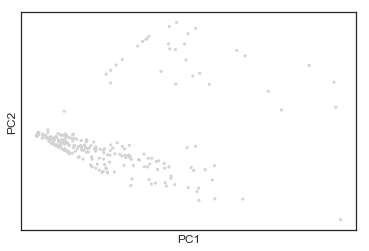

In [10]:
sc.pl.pca(adata)

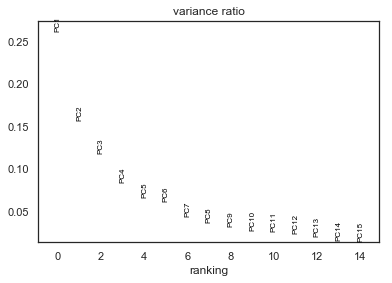

In [11]:
sc.pl.pca_variance_ratio(adata)

In [27]:
sc.pp.neighbors(adata, n_neighbors=5, n_pcs=9)

In [28]:
sc.tl.umap(adata)

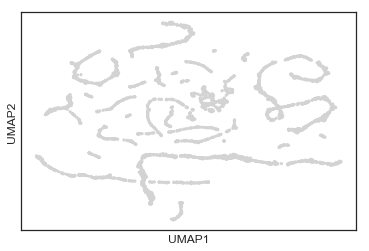

In [29]:
sc.pl.umap(adata)

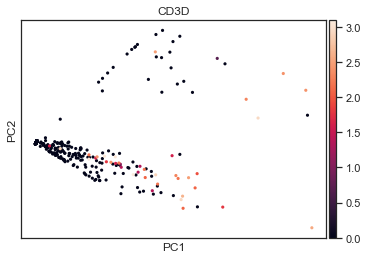

In [11]:
sc.pl.pca(adata, color='CD3D')